# Problem 2. Thornton & Marion, 4-10.

The parameters $F=0.7$ and $c=0.05$ are fixed for Equation 4.43 describing the driven, damped pendulum. Determine which of the values for $\omega$ (0.1, 0.2, 0.3, $\ldots$, 1.5) produce chaotic motion. Produce a phase plot for $\omega=0.3$. Do this problem numerically.

In the following phase diagrams, $x$-axis is angle($x=\theta$) and $y$-axis is angular velocity($y=\dot{x}$).

### Differential equation we need to solve
$\dot{x}=y,\,\dot{y}=-0.05y-\sin x+0.7\cos\omega t$

### Package importing & defining functions

scipy has module for solving ODEs. Function defined inside the code is needed for the odeint() function.
ftn() gets $z$(tuple of $x$ and $y$), $\omega$, and $t$ as arguments, and its output is derivative of $(x,y)$.

In [62]:
# odeint : module for the ODEs

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

pi = 3.141592
omega = 0.1
j = 1 # index

def ftn(z, omega, t):
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = - 0.05 * y - np.sin(x) + 0.7 * np.cos(omega * t)
    dzdt = [dxdt, dydt]
    return dzdt

### Solving ODE with odeint() function
First loop about $k$ varies $\omega$ values from 0.1 to 1.5.
Second loop about $i$ is iterative solving of ODE.

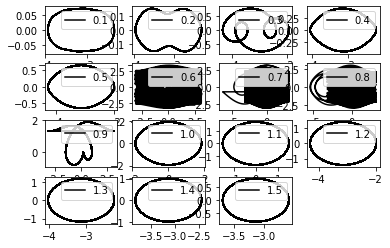

In [63]:
for k in range (0,15):
    z0 = [0.8,0] # initial position
    n = 100000 # total number of steps
    
    t = np.linspace(0, 2000, n) # time
    x = np.empty_like(t)
    y = np.empty_like(t) # generate empty list
    x[0] = z0[0]
    y[0] = z0[1] # initialize x and y
    
    for i in range (1,n):
        tspan = [t[i-1], t[i]] # time interval
        z = odeint(ftn, z0, tspan, args = (omega,)) # iterative solve
        
        # clumsy code to convert x values inside (-pi,pi).
        x[i] = z[1][0] - pi
        if (z[1][0] > pi):
            x[i] = x[i] % (2*pi) - pi
        elif (z[1][0] < -pi):
            x[i] = x[i] % (2*pi) - pi
        y[i] = z[1][1] # y needs no modification
        
        z0 = z[1] # re-initialize for the next iterative step
        
    plt.subplot(4,4,j)
    # Take the time when transient effect is dead
    plt.plot(x[round(n/2):n], y[round(n/2):n], 'k-', label = round(omega,1))
    plt.legend(loc = 'upper right')
    j += 1 # index for the subplot
    omega = round(omega + 0.1, 1)

plt.show()

(If the figure is so small, I recommend to copy the previous code into some .py file and execute in shell.)

### Observing chaotic behavior with Poincare section

We can see that $\omega=0.6,\,0.7$ and $0.8$ shows chaotic behavior. To be subtle, I'll draw Poincare section for these cases.
### $\omega=0.6$ case

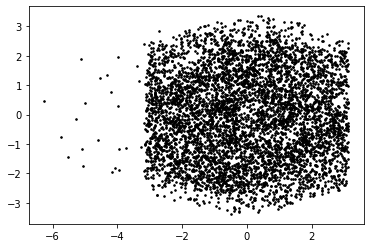

In [88]:
# re-calculation
n = 3000000
omega = 0.6
z0 = [0.8,0]
    
t = np.linspace(0, 60000, n)
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]

for i in range (1,n):
    tspan = [t[i-1], t[i]]
    z = odeint(ftn, z0, tspan, args = (omega,))
    x[i] = z[1][0] - pi
    if (z[1][0] > pi):
        x[i] = x[i] % (2*pi) - pi
    elif (z[1][0] < -pi):
        x[i] = x[i] % (2*pi) - pi
    y[i] = z[1][1]
    z0 = z[1]

# N : number of points in poincare section
N = round(omega*60000/(2*pi)) - 1

# truncated x and y : to pick points for poincare section
x_tr = np.zeros(N+1)
y_tr = np.zeros(N+1)

for i in range (0,N):
    x_tr[i] = x[i*(round(n/N)-1)]
    y_tr[i] = y[i*(round(n/N)-1)]

# scattered plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_tr, y_tr, marker='.', color='black', s = 10)
plt.show()

### $\omega=0.7$ case

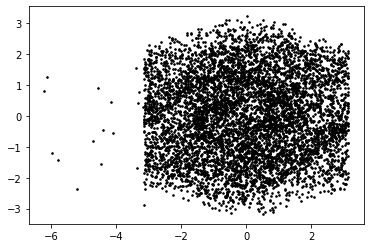

In [89]:
# re-calculation
n = 3000000
omega = 0.7
z0 = [0.8,0]
    
t = np.linspace(0, 60000, n)
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]

for i in range (1,n):
    tspan = [t[i-1], t[i]]
    z = odeint(ftn, z0, tspan, args = (omega,))
    x[i] = z[1][0] - pi
    if (z[1][0] > pi):
        x[i] = x[i] % (2*pi) - pi
    elif (z[1][0] < -pi):
        x[i] = x[i] % (2*pi) - pi
    y[i] = z[1][1]
    z0 = z[1]

# N : number of points in poincare section
N = round(omega*60000/(2*pi)) - 1

# truncated x and y : to pick points for poincare section
x_tr = np.zeros(N+1)
y_tr = np.zeros(N+1)

for i in range (0,N):
    x_tr[i] = x[i*(round(n/N)-1)]
    y_tr[i] = y[i*(round(n/N)-1)]

# scattered plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_tr, y_tr, marker='.', color='black', s = 10)
plt.show()

Clearly, Poincare section for $\omega=0.6$ and $0.7$ shows chaotic behavior. However, Poincare section for $\omega=0.8$ does not show chaotic behavior.

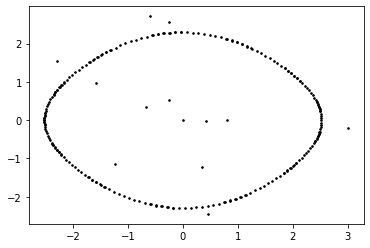

In [76]:
# re-calculation
n = 3000000
omega = 0.8
z0 = [0.8,0]
    
t = np.linspace(0, 60000, n)
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]

for i in range (1,n):
    tspan = [t[i-1], t[i]]
    z = odeint(ftn, z0, tspan, args = (omega,))
    x[i] = z[1][0] - pi
    if (z[1][0] > pi):
        x[i] = x[i] % (2*pi) - pi
    elif (z[1][0] < -pi):
        x[i] = x[i] % (2*pi) - pi
    y[i] = z[1][1]
    z0 = z[1]

# N : number of points in poincare section
N = round(omega*2000/(2*pi)) - 1

# truncated x and y : to pick points for poincare section
x_tr = np.zeros(N+1)
y_tr = np.zeros(N+1)

for i in range (0,N):
    x_tr[i] = x[i*round(n/N)]
    y_tr[i] = y[i*round(n/N)]

# scattered plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_tr, y_tr, marker='.', color='black', s = 10)
plt.show()

The Poincare section has elliptical form. I think that this form of section came from the approximations inside the code that calculates Poincare section.

I used round() function to obtain integer indexes, so this approximation may have affected the "phase" a little bit. If this hypothesis is true, phase space trajectory for $\omega=0.8$ after a long time would have an elliptical form. So I drew it again.

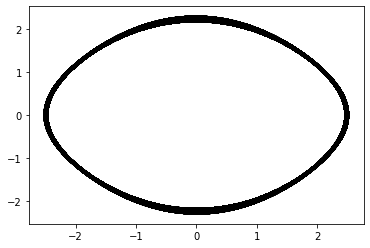

In [78]:
# re-calculation
n = 100000
omega = 0.8
z0 = [0.8,0]
    
t = np.linspace(0, 60000, n)
x = np.empty_like(t)
y = np.empty_like(t)
x[0] = z0[0]
y[0] = z0[1]

for i in range (1,n):
    tspan = [t[i-1], t[i]]
    z = odeint(ftn, z0, tspan, args = (omega,))
    x[i] = z[1][0] - pi
    if (z[1][0] > pi):
        x[i] = x[i] % (2*pi) - pi
    elif (z[1][0] < -pi):
        x[i] = x[i] % (2*pi) - pi
    y[i] = z[1][1]
    z0 = z[1]

plt.plot(x[round(5*n/6):n], y[round(5*n/6):n], 'k-', label = round(omega,1))
plt.show()

Yes, this is an ellipse: therefore, $\omega=0.8$ just converges slowly to some trajectory. $\omega=0.6$ and $0.7$ shows chaotic behavior.